<a href="https://colab.research.google.com/github/kokejohh/PMU_Module_3/blob/main/PMU_B_MLModels_Cls_%26_Reg_(Practices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis and Linear Classification
จัดทำโดย จิรายุ เพชรแหน ภาควิชาวิศวกรรมคอมพิวเตอร์ คณะวิศวกรรมศาสตร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง

----

In [ ]:
Learning by Pitchakorn Thiprangsi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


!pip install opendatasets
import opendatasets as od

od.download('https://www.kaggle.com/datasets/farhanmd29/50-startups')

df = pd.read_csv('./50-startups/50_Startups.csv')
df.head()

Skipping, found downloaded files in "./50-startups" (use force=True to force download)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


from matplotlib import pyplot as plt
_df_0['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Marketing Spend'].plot(kind='line', figsize=(8, 4), title='Marketing Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Marketing Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

---
#### Single variable, e.g., Marketing Spend to Profit

In [ ]:
X = df[['Marketing Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train

,Marketing Spend
12,249839.44
4,366168.42
37,197029.42
8,311613.29
3,383199.62
6,127716.82
41,164470.71
46,297114.46
47,0.00
15,261776.23


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_predictions = lin_reg.predict(x_test)
y_predictions

array([120440.33174329,  98457.01051638,  74718.08631455,  49462.22193873,
       128906.20665138,  48923.31296724,  86866.2968753 ,  87973.74740994,
        61967.78134498,  48923.31296724])

In [ ]:
lin_reg.coef_, lin_reg.intercept_ # Take a look at the parameters learnt

(array([0.28305083]), np.float64(48923.31296724075))

<function matplotlib.pyplot.show(close=None, block=None)>

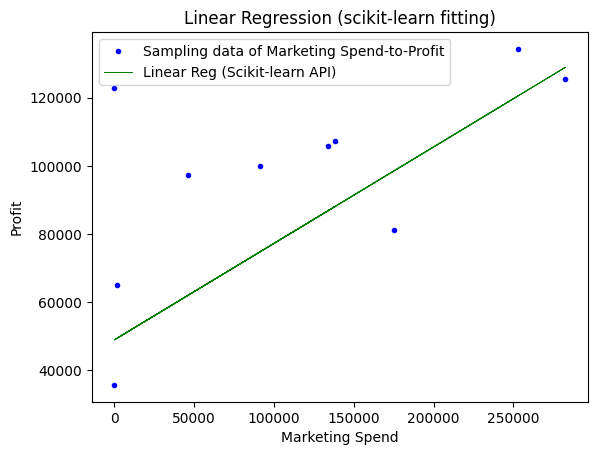

In [ ]:
plt.plot(x_test, y_test, "b.", label='Sampling data of Marketing Spend-to-Profit')
# plt.plot(X, y_test, "r-.", label='True expression', linewidth=0.5)
y_hat = lin_reg.coef_[0]*x_test + lin_reg.intercept_
plt.plot(x_test, y_predictions, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.show

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

900533964.2328259

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

23639.881154096685

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(30008.898084282035)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: -0.11205578997827947


----
### Correlation analysis and try to use R&D Spend as single and only variable

In [ ]:
# Add correlation analysis
df_nonstate = df.drop('State', axis=1)
correlation_matrix = df_nonstate.corr().style.background_gradient()
display(correlation_matrix)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_predictions = lin_reg.predict(x_test)
y_predictions

array([127862.20996405,  82250.56334619, 102255.72078164,  50190.4734756 ,
       130136.88190548,  49799.36685472, 113638.0775288 , 104535.0534288 ,
       103463.04843113, 123105.31102669])

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([0.85360911]), np.float64(49336.6680379911))

<function matplotlib.pyplot.show(close=None, block=None)>

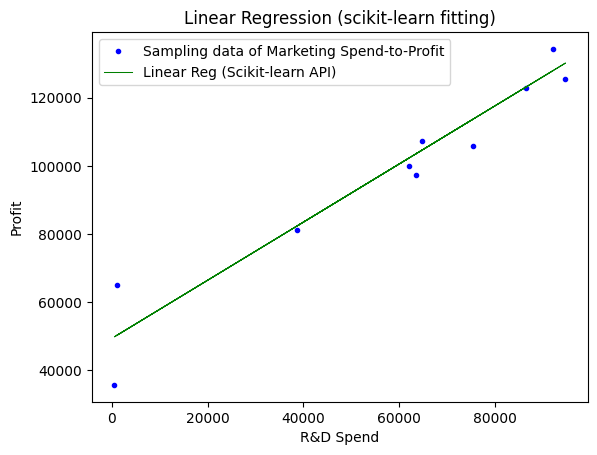

In [ ]:
plt.plot(x_test, y_test, "b.", label='Sampling data of Marketing Spend-to-Profit')
# plt.plot(X, y_test, "r-.", label='True expression', linewidth=0.5)
y_hat_linear = lin_reg.coef_[0]*x_test + lin_reg.intercept_
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scikit-learn fitting)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(7714.334890830185)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9265108109341951


---
#### Multiple Variable, e.g., all features [R&D Spend, ..., Marketing Spend]



In [ ]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
x_train

,R&D Spend,Administration,Marketing Spend
12,93863.75,127320.38,249839.44
4,142107.34,91391.77,366168.42
37,44069.95,51283.14,197029.42
8,120542.52,148718.95,311613.29
3,144372.41,118671.85,383199.62
6,134615.46,147198.87,127716.82
41,27892.92,84710.77,164470.71
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
15,114523.61,122616.84,261776.23


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

y_predictions = lin_reg.predict(x_test)
y_predictions

array([126382.71980892,  84926.76721707,  98785.93283229,  46793.01439237,
       128786.74286925,  51290.81994662, 108817.27261884, 100746.64724815,
        97589.36529525, 112853.57340378])

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

80926321.22295158

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

6979.152252370402

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(8995.905803361415)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.899206777357667


---
### Polynomial (Single-var)

In [ ]:
X = df[['R&D Spend']]
y = df['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([128786.75560231,  82466.85162857, 103090.73390656,  48411.29736649,
       131031.23848365,  47988.21456969, 114610.26131746, 105410.0139386 ,
       104319.99947052, 124072.87281665])

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(47487.448733379264), array([ 9.24074522e-01, -4.38224307e-07]))

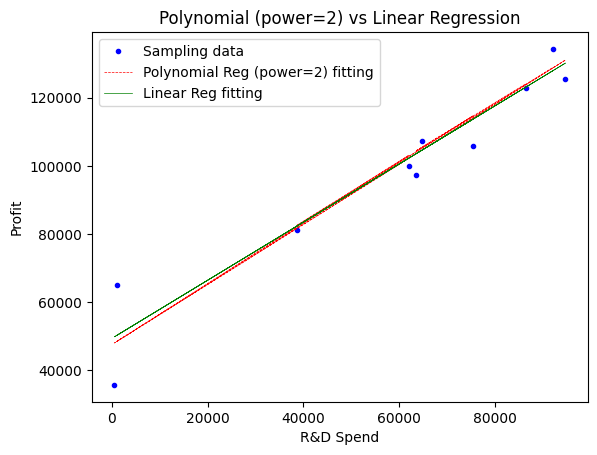

In [ ]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve
y_hat_poly2 = lin_reg.coef_[0]*x_test + lin_reg.coef_[1]*(x_test**2) + lin_reg.intercept_
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power=2) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

(np.float64(0.0),
 np.float64(80000.0),
 np.float64(47500.0),
 np.float64(120000.0))

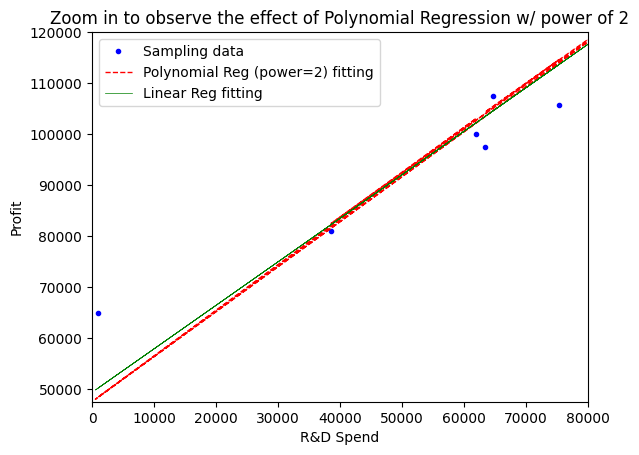

In [ ]:
plt.plot(x_test, y_test, "b.", label='Sampling data')
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=1)
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)
plt.title('Zoom in to observe the effect of Polynomial Regression w/ power of 2')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.axis([0, 80000, 47500, 120000]) # [xmin, xmax, ymin, ymax]

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

63094698.59322874

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

6368.450528569773

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(7943.2171437792595)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.9220853097447484


3rd degree

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([126222.41070681,  87313.07857057, 106280.28647418,  40999.95576583,
       127986.14984856,  40264.04121464, 115364.83396795, 108163.96743326,
       107283.0533454 , 122582.18949463])

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(39387.12190465252),
 array([ 1.62410226e+00, -1.16832245e-05,  4.66293356e-11]))

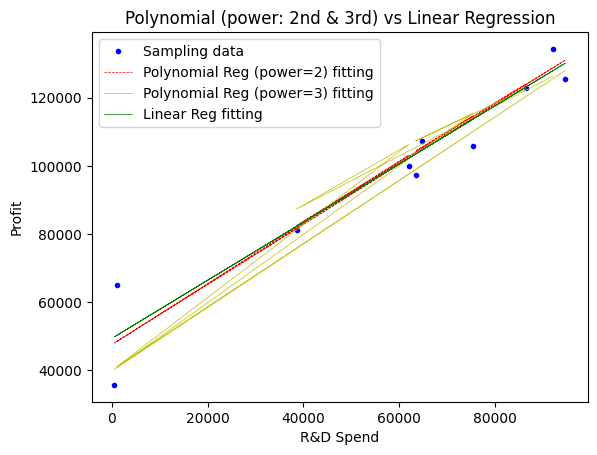

In [ ]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve (deg=2)
plt.plot(x_test, y_hat_poly2, "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the polynomial regression curve (deg=3)
y_hat_poly3 = lin_reg.coef_[0]*x_test + lin_reg.coef_[1]*(x_test**2) + lin_reg.coef_[2]*(x_test**3) + lin_reg.intercept_
plt.plot(x_test, y_hat_poly3, "y-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power: 2nd & 3rd) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# Sort x_test and get the corresponding indices
x_test_sorted = x_test.sort_values(by='R&D Spend')
sorted_indices = x_test_sorted.index

# Reindex y_hat_poly3 to match the sorted x_test
y_hat_poly3_sorted = y_hat_poly3.reindex(sorted_indices)

print('True expression:\n',x_test_sorted,'\nPoly-feature (3rd-deg) predictions:\n',y_hat_poly3_sorted)

True expression:
     R&D Spend
48     542.05
45    1000.23
39   38558.51
30   61994.48
32   63408.86
25   64664.71
26   75328.87
19   86419.70
13   91992.39
17   94657.16 
Poly-feature (3rd-deg) predictions:
 48     40264.041215
45     40999.955766
39     87313.078571
30    106280.286474
32    107283.053345
25    108163.967433
26    115364.833968
19    122582.189495
13    126222.410707
17    127986.149849
Name: R&D Spend, dtype: float64


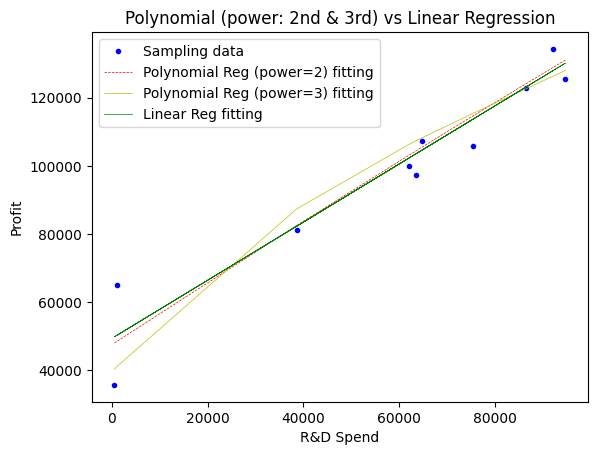

In [ ]:
# Plot the data
plt.plot(x_test, y_test, "b.", label='Sampling data')

# Plot the polynomial regression curve (deg=2)
plt.plot(x_test_sorted['R&D Spend'], y_hat_poly2.reindex(sorted_indices), "r--", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Plot the polynomial regression curve (deg=3)
y_hat_poly3 = lin_reg.coef_[0]*x_test_sorted['R&D Spend'] + lin_reg.coef_[1]*(x_test_sorted['R&D Spend']**2) + lin_reg.coef_[2]*(x_test_sorted['R&D Spend']**3) + lin_reg.intercept_
plt.plot(x_test_sorted['R&D Spend'], y_hat_poly3, "y-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

# Plot the simple linear regression line
plt.plot(x_test, y_hat_linear, "g-", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power: 2nd & 3rd) vs Linear Regression')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
# plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

93625591.3546363

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

7230.829488729767

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9676.031797934333)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.8843831714390008


---
### Polynomial (Multi-var)

In [ ]:
df_num = df.drop('State', axis=1)
X = df_num.drop('Profit',axis=1)
y = df_num['Profit']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly,y_train)

x_test_poly = poly_features.fit_transform(x_test)
y_predictions = lin_reg.predict(x_test_poly)
y_predictions

array([125852.26351662,  87703.18706851,  95796.57232823,  31600.07037512,
       122662.85612793,  -5239.64117211, 112009.33618594, 106337.97623744,
        89176.09951206,  92873.411372  ])

In [ ]:
# mse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_mse

90304882.2778587

In [ ]:
# mae loss
from sklearn.metrics import mean_absolute_error
import numpy as np
lin_mae = mean_absolute_error(y_test, y_predictions)
lin_mae

7506.0645971984

In [ ]:
# rmse loss
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(9502.888101932944)

In [ ]:
from sklearn.metrics import r2_score
r2_multi_var = r2_score(y_test, y_predictions)
print(f"R-squared for Multi-Variable Model: {r2_multi_var}")

R-squared for Multi-Variable Model: 0.514918250351362


----
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the binary target variable
df['Profit_Class'] = (df['Profit'] > 150000).astype(int)

# Select features and target
# Using the numerical features from the previous multiple variable example
df_num = df.drop('State', axis=1)
X = df_num.drop(['Profit', 'Profit_Class'], axis=1)
y = df_num['Profit_Class']

In [ ]:
y

,Profit_Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8285714285714286
Confusion Matrix:
[[24  4]
 [ 2  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.56      0.71      0.62         7

    accuracy                           0.83        35
   macro avg       0.74      0.79      0.76        35
weighted avg       0.85      0.83      0.84        35



----
### ฝึกฝนด้วยตัวเอง

ชุดข้อมูลประเมินคุณภาพไวน์ (Wine quality) จากข้อมูลคุณลักษณะที่มี (feature attributes) ได้แบ่งการประเมินเป็นคะแนนคุณภาพ "Quality" column
1. ต้องการสร้างโมเดลทำนายคะแนนคุณภาพไวน์ (Hint: การวิเคราะห์การถดถอยเชิงเส้น)

2. โมเดลคัดแบตซ์ไวน์มีคุณภาพไม่ ให้เกณฑ์การคัดแยกอยุ่ที่ 6 คะแนน (> 6 คะแนน เท่ากับไวน์ดี มิฉะนั้น <= 6 คะแนน เท่ากับไวน์คุณภาพแย่) (Hint: การจำแนกประเภท)

```python
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")

print(os.listdir(path)) # choose "['wineQualityReds.csv']"

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)
```